## Adding noise to audio clips
<https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb81>

Things to test:\
<https://github.com/iver56/audiomentations>
<https://pytorch.org/audio/main/tutorials/audio_data_augmentation_tutorial.html>

In [1]:
import librosa
import matplotlib.pyplot as plt
import IPython
import torch

from birdclassification.preprocessing.augmentations import InvertPolarity, AddWhiteNoise, RandomGain, TimeShift, AddBackgroundNoise, PitchShifting, RandomChunk
import torchaudio

In [2]:
def print_audio(signal, sr):
    print(plt.plot(signal), end='\n')
    print(f"Sampling rate = {sr}", end = '\n')
    display(IPython.display.Audio(signal, rate = sr))

In [3]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    time_axis = torch.arange(0, num_frames) / sample_rate

    axes = plt.plot(time_axis, waveform[1], linewidth=1)
    if xlim:
        axes.set_xlim(xlim)
    if ylim:
        axes.set_ylim(ylim)
    plt.show(block=False)

In [4]:
invert_polarity = InvertPolarity()
add_noise = AddWhiteNoise(min_factor=0.1, max_factor=0.8)
random_gain = RandomGain(min_factor=0.5, max_factor=1.5)
time_shift = TimeShift(min_factor=0.1, max_factor=0.3)
add_background = AddBackgroundNoise(min_factor=0.1, max_factor=0.8, NOISES_DIR = "/Users/zosia/Desktop/noises/"),
pitch_shift = PitchShifting(sr = 32000, min_semitones=1, max_semitones=10)
random_chunk = RandomChunk(sr = 32000, min_factor=0.1 , max_factor=1), 

### Original file

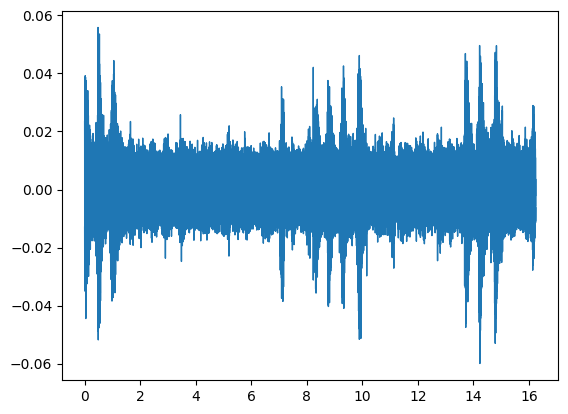

In [5]:
s, sr = torchaudio.load('../test_recordings/XC828343 - Tawny Owl - Strix aluco.wav')
plot_waveform(s, sr)

### Gaussian noise (white noise)

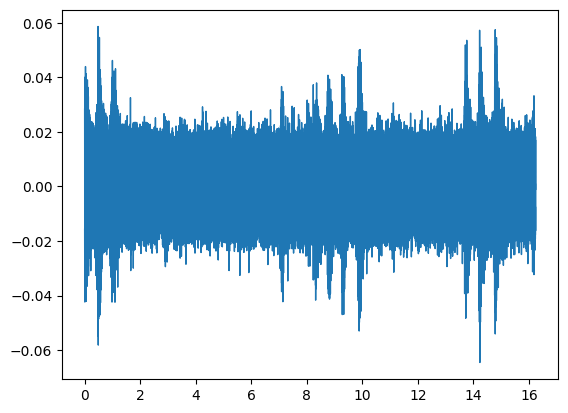

In [6]:
noisy_signal = add_noise(s)
plot_waveform(noisy_signal, sr)

### Invert polarity

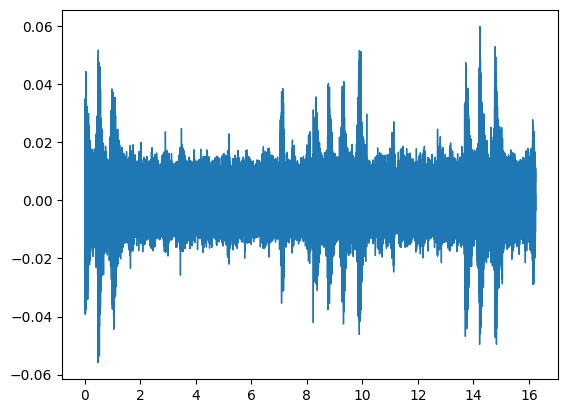

In [7]:
pitch_shifted_signal = invert_polarity(s)
plot_waveform(pitch_shifted_signal, sr)

### Random gain

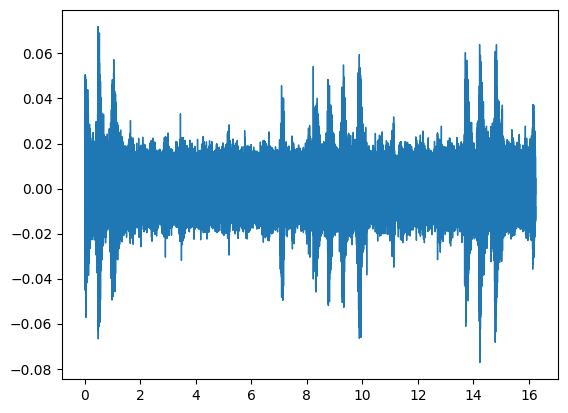

In [8]:
random_gain_signal = random_gain(s)
plot_waveform(random_gain_signal, sr)

### Background noise

In [9]:
print(s.shape)
noisy_signal = add_background(s)
plot_waveform(noisy_signal, sr)

torch.Size([2, 779390])


TypeError: 'tuple' object is not callable

### Time Shift

In [ ]:
noisy_signal = time_shift(s)
plot_waveform(noisy_signal, sr)

### Random Chunk

In [ ]:
noisy_signal = random_chunk(s)
plot_waveform(noisy_signal, sr)

### Pitch Shifting

In [ ]:
shifted = pitch_shift(s)
plot_waveform(shifted, sr)

### NOT USED

In [ ]:
signal, sr = torchaudio.load('../test_recordings/XC828343 - Tawny Owl - Strix aluco.wav')

### Random partial stretching in time and frequency

In [ ]:
import numpy as np
import random

min_duration = 0.5
max_duration = 4
time_sd = 0.05
pitch_sd = 0.25
time_mean = 1
pitch_mean = 1

start = 0
new_signal = []
min_segment = int(min_duration * sr)
max_segment = int(max_duration * sr)
while start < len(signal):
    length = random.randint(min_segment, max_segment)
    segment = signal[start:min(start + length, len(signal))]

    time_stretch_rate = np.random.normal(time_mean, time_sd)
    segment = librosa.effects.time_stretch(segment, rate=time_stretch_rate)

    n_semitones = np.random.normal(pitch_mean, pitch_sd)
    segment = librosa.effects.pitch_shift(segment, sr=sr, n_steps=n_semitones)

    start = min(start + length, len(signal))
    new_signal.extend(segment)

print_audio(noisy_signal, sr)

### Time stretch

In [ ]:
stretched_signal = librosa.effects.time_stretch(signal, rate=0.5)
print_audio(stretched_signal, sr)

### Pitch shifting

In [ ]:
pitch_shifted_signal = librosa.effects.pitch_shift(signal, sr=sr, n_steps=10)
print_audio(pitch_shifted_signal, sr)